## Mnist dataset digit recognition

### Download and prepare data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!pip install -q tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
tf.__version__

'2.11.0'

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape) 

11490434/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Label:  5


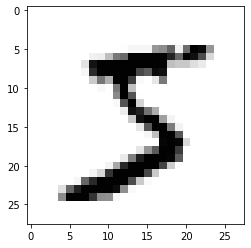

In [7]:
print("Label: ", y_train[0])
_ = plt.imshow(X_train[0], cmap='Greys')

Label:  8


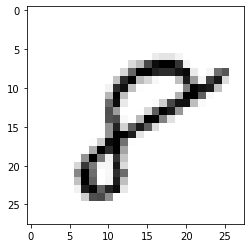

In [8]:
print("Label: ", y_train[-1])
_ = plt.imshow(X_train[-1], cmap='Greys')

In [9]:
# scaling
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape) 

X_train shape:  (60000, 784)
y_train shape:  (60000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)


In [12]:
# smaller dataset can also be useful

X_train_mini = X_train[:6000]
y_train_mini = y_train[:6000]
X_test_mini = X_test[:1000]
y_test_mini = y_test[:1000]

In [13]:
print('X_train_mini shape: ', X_train_mini.shape)
print('y_train_mini shape: ', y_train_mini.shape)
print('X_test_mini shape: ', X_test_mini.shape)
print('y_test_mini shape: ', y_test_mini.shape) 

X_train_mini shape:  (6000, 784)
y_train_mini shape:  (6000,)
X_test_mini shape:  (1000, 784)
y_test_mini shape:  (1000,)


### Predictions with SVC (Support Vector Classification) 

In [14]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train_mini, y_train_mini)

SVC(gamma=0.001, kernel='linear')

In [19]:
y_pred_mini = classifier.predict(X_test_mini)

In [21]:
results_mini = pd.DataFrame({
    'y_true': y_test_mini,
    'y_pred': y_pred_mini})

results_mini.head()

,y_true,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(results_mini['y_true'], results_mini['y_pred']))

0.895


In [23]:
classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [24]:
# SVC training on complete model take a few minutes
y_pred = classifier.predict(X_test)

In [25]:
# predictions with this model also weren't ready in one second
results = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred})

results.head()

,y_true,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [26]:
print(accuracy_score(results['y_true'], results['y_pred']))

0.9404


In [28]:
# Accuracy with bigger model is better
# Let's do something with confussion matrix

from sklearn.metrics import confusion_matrix

conf_svc = confusion_matrix(results['y_true'], results['y_pred'])
conf_svc


array([[ 957,    0,    4,    1,    1,    6,    9,    1,    0,    1],
       [   0, 1122,    3,    2,    0,    1,    2,    1,    4,    0],
       [   8,    6,  967,   11,    3,    3,    7,    8,   17,    2],
       [   4,    3,   16,  947,    1,   16,    0,    9,   12,    2],
       [   1,    1,   10,    1,  942,    2,    4,    2,    3,   16],
       [  10,    4,    3,   36,    6,  803,   13,    1,   14,    2],
       [   9,    2,   13,    1,    5,   16,  910,    1,    1,    0],
       [   1,    8,   21,   10,    8,    1,    0,  957,    3,   19],
       [   8,    4,    6,   25,    7,   26,    6,    7,  877,    8],
       [   7,    7,    2,   11,   33,    4,    0,   18,    5,  922]],
      dtype=int64)

In [30]:
!pip install mlxtend

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

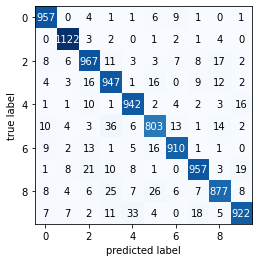

In [34]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_svc)

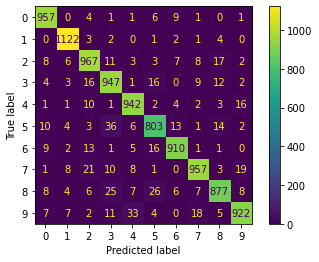

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_svc)
disp.plot()


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['linear', 'poly', 'rbf'],
             'gamma' : [0.001, 'scale']}

classifier = SVC()

svc_grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
svc_grid_search.fit(X_train_mini, y_train_mini)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.001, 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [40]:
svc_grid_search.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [41]:
# Use params from small model to bigger one

classifier = SVC(gamma='scale', kernel='rbf')
classifier.fit(X_train, y_train)

SVC()

In [42]:
y_pred = classifier.predict(X_test)
results['y_pred_grid_search'] = y_pred
results.head()

,y_true,y_pred,y_pred_grid_search
0,7,7,7
1,2,2,2
2,1,1,1
3,0,0,0
4,4,4,4


In [43]:
print("Accuracy with parameters from Grid Search:", accuracy_score(results['y_true'], results['y_pred_grid_search']))

Accuracy with parameters from Grid Search: 0.9792


In [44]:
# Result is better than previous (~0.94)

In [45]:
conf_svc_gs = confusion_matrix(results['y_true'], results['y_pred_grid_search'])
conf_svc_gs

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]],
      dtype=int64)

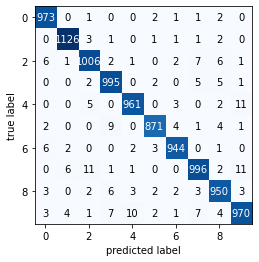

In [46]:
_ = plot_confusion_matrix(conf_svc_gs)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(results['y_true'], results['y_pred_grid_search']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Predictions with simple neural network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    model.add(Dense(input_shape=(28*28,), units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = build_model()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0683 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.0703 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0748 - val_accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0423 - accuracy: 0.9856 - val_loss: 0.0735 - val_accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0378 - accuracy: 0.9873 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0360 - accuracy: 0.9877 - val_loss: 0.0683 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0789 - val_accuracy:

In [59]:
# Best accuracy in such simple neural network is 0.9809 (in 8. epoch)
# Training process is also much faster than SVC training

In [63]:
predictions = model.predict(X_test)
classes = np.argmax(predictions ,axis=1)

313/313 [==============================] - 0s 521us/step


In [64]:
classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [65]:
results['y_pred_neural_n'] = classes
results.head()

,y_true,y_pred,y_pred_grid_search,y_pred_neural_n
0,7,7,7,7
1,2,2,2,2
2,1,1,1,1
3,0,0,0,0
4,4,4,4,4


In [66]:
results.tail(10)

,y_true,y_pred,y_pred_grid_search,y_pred_neural_n
9990,7,7,7,7
9991,8,8,8,8
9992,9,9,9,9
9993,0,0,0,0
9994,1,1,1,1
9995,2,2,2,2
9996,3,3,3,3
9997,4,4,4,4
9998,5,5,5,5
9999,6,6,6,6


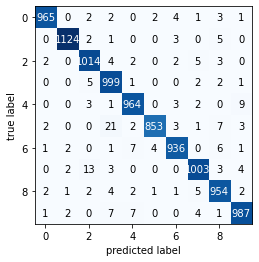

In [67]:
conf_svc_nn = confusion_matrix(results['y_true'], results['y_pred_neural_n'])
_ = plot_confusion_matrix(conf_svc_nn)

In [68]:
# pretty good results